<h1>Artificial Intelligence Engineer - Capstone Project</h1>
<hr>
Submitted by: Yanda Sebega <br>
Date: 28-Mar-2022 <br>
Module: Artificial Intelligence Capstone Project <br>
Institution: Simplilearn Solutions <br>



<hr>
<h2> Import libraries </h2>

In [1]:
# load dataset packages
import numpy as np
import pandas as pd
# EDA Packages...
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Modelling techniques packages
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Applying ANN techniques packages
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Flatten, Dense, Activation, Dropout)
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import (Adam, RMSprop, SGD)
from keras.wrappers.scikit_learn import KerasClassifier

# Anomaly detection packages
from sklearn.cluster import DBSCAN
from scipy.stats import multivariate_normal
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest


<hr>
<h2> Load dataset </h2>

In [2]:
# Reading the datasets
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_data.csv')
test_data_hidden = pd.read_csv('data/test_data_hidden.csv')

In [3]:
# Getting to know the dataset structure.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [4]:
# Check for missing values in train_data dataset
train_data.isnull().values.any()

False

In [5]:
# Check for missing values in test_data dataset
test_data.isnull().values.any()

False

In [6]:
# Check for missing values in test_data_hidden dataset
test_data_hidden.isnull().values.any()

False

<h2> 1. Exploratory Data Analysis (EDA) </h2>

<h3> 1.1. Perform an EDA on the dataset </h3>

In [7]:
# Check the shape of the training set
train_data.shape

(227845, 31)

In [8]:
# View the five first rows
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [9]:
# columns of the dataset
train_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
len(train_data.columns)

31

In [11]:
# Get the latent columns (without time, class or amount) to be inputted in a)
# with respective position 0, 29, and 30
latent_features = train_data.columns[1:29]


In [12]:
latent_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [13]:
# a) Check all the latent features and parameters with their mean and std.
train_data[latent_features].describe().T

,count,mean,std,min,25%,50%,75%,max
V1,227845.0,-0.003321,1.963028,-56.407510,-0.922851,0.012663,1.314821,2.454930
V2,227845.0,-0.001652,1.661178,-72.715728,-0.598040,0.066665,0.804401,22.057729
V3,227845.0,0.001066,1.516107,-32.965346,-0.889246,0.182170,1.029449,9.382558
V4,227845.0,-0.000374,1.415061,-5.683171,-0.848884,-0.019309,0.744822,16.875344
V5,227845.0,0.000877,1.367074,-42.147898,-0.690811,-0.055243,0.610852,34.801666
V6,227845.0,0.000770,1.325341,-26.160506,-0.767803,-0.273025,0.400298,22.529298
V7,227845.0,-0.000035,1.220384,-43.557242,-0.554761,0.040409,0.570631,36.877368
V8,227845.0,0.001625,1.192648,-73.216718,-0.207838,0.022928,0.327854,20.007208
V9,227845.0,-0.000391,1.097367,-13.434066,-0.643365,-0.050932,0.596671,15.594995
V10,227845.0,-0.000794,1.087268,-24.588262,-0.535584,-0.092068,0.454152,23.745136


In [14]:
# b) Connection between Time, Amount, and transaction being fraudulent
transactions = train_data[['Time', 'Amount', 'Class']]
fraudulent_transactions = transactions[transactions['Class']==1]

In [15]:
# First five rows of the reduced dataset
fraudulent_transactions.head()

,Time,Amount,Class
266,41181.0,11.38,1
360,93853.0,316.06,1
421,102572.0,0.01,1
734,53658.0,0.00,1
854,8169.0,1.00,1


In [16]:
# Allocate time to x-axis and amount to y-axis
X = pd.to_datetime(fraudulent_transactions['Time'], unit='s').dt.hour
Y = fraudulent_transactions['Amount']

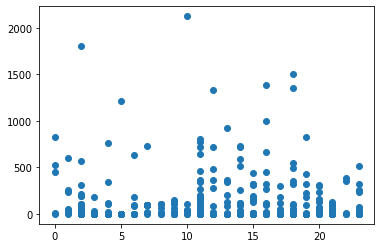

In [17]:
# Plotting our data...
plt.scatter(X, Y)

We see real pattern between the time and the amount for the fraudulent transactions. They are fairly spread out.

<h3> 1.2. Check class count for each class </h3>

In [18]:
# Target class count
train_data['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

This is dataset is highly unbalanced. Fraudulent transactions account for 0.17%. 

<h3> 1.3. Undersampling or oversampling</h3>

The 'Time' and 'Amount' features are on a different. This can create preferential treatment for the model. That's the reason for scaling using the StandardScaler class.

In [19]:
sc = StandardScaler()

train_data['scaled_amount'] = sc.fit_transform(train_data['Amount'].values.reshape(-1,1))
train_data['scaled_time'] = sc.fit_transform(train_data['Time'].values.reshape(-1,1))

test_data['scaled_amount'] = sc.fit_transform(test_data['Amount'].values.reshape(-1,1))
test_data['scaled_time'] = sc.fit_transform(test_data['Time'].values.reshape(-1,1))

test_data_hidden['scaled_amount'] = sc.fit_transform(test_data_hidden['Amount'].values.reshape(-1,1))
test_data_hidden['scaled_time'] = sc.fit_transform(test_data_hidden['Time'].values.reshape(-1,1))

In [20]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,-0.156600,-1.187316
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,-0.288523,-1.519945
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,-0.352771,-1.943605
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,-0.313351,-0.167996
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,-0.195737,0.683136


In [21]:
y = train_data['Class']
X = train_data.drop(columns=['Class', 'Time', 'Amount'])

In [22]:
# View the shapes
print(X.shape, y.shape)

(227845, 30) (227845,)


In [23]:
# a. Undersampling or oversampling can be used to tackle the class imbalance problem
# undersampling
rus = RandomUnderSampler(sampling_strategy='auto', 
                         random_state=0, 
                         replacement=True)

In [24]:
# Resample using random undersampling technique
X_rus, y_rus = rus.fit_resample(X, y)

In [25]:
# after resampling...value counts
y_rus.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [26]:
#  b.Oversampling increases the prior probability of imbalanced class and in case of other classifiers, 
# error gets multiplied as the low-proportionate class is mimicked multiple times.
ros = RandomOverSampler(sampling_strategy='auto', 
                        random_state=0)

In [27]:
# Resample using random over sampling technique
X_ros, y_ros = ros.fit_resample(X, y)

In [28]:
# value count
y_ros.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [29]:
# split the data using train_test_split from sklearn.model_selection
X_train, X_valid, y_train, y_valid = train_test_split(X_ros, 
                                                      y_ros, 
                                                      test_size=.3, 
                                                      random_state=0)


In [30]:
# Logistic regression function usng default parameters of the class: C=1.0, penalty='l2', tol=0.0001, solver="lbfgs"
def logistic_regression(x_train, x_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    print('Prediction')
    pred = lr.predict(x_test)
    print('Logistic regression f1 score: {}'.format(f1_score(y_test, pred)))

<h3> 1.4. F1-Score </h3>

In [31]:
# Prediction 
logistic_regression(X_train, X_valid, y_train, y_valid)

Prediction
Logistic regression f1 score: 0.9517037751197615


The logistic regression f1 score is <b>95.17%</b>. 

<hr>
<h2> 2. Modelling Techniques </h2>

<h3> 2.a Random Forest Classifier </h3>

In [32]:
# a) Random Forest Classifier function
def random_forest_classifier(X_train, X_test, y_train, y_test):
    
    rfc = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=77, class_weight='balanced')
    rfc.fit(X_train, y_train)
    
    print('Test set')
    pred = rfc.predict(X_test)
    print('Random Forests f1-score: {}'.format(f1_score(y_test, pred)))
    

In [33]:
# call the RDF function above with split datasets
random_forest_classifier(X_train, X_valid, y_train, y_valid)


Test set
Random Forests f1-score: 0.9501583673970229


<h3> 2.b XGBoost </h3>

In [34]:
# b) XGBoost function
def xgboost(X_train, X_test, y_train, y_test):
    
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    pred = xgb.predict(X_test)
    print('XGBoost f1-score: {}'.format(f1_score(y_test, pred)))

In [35]:
# call the XGBoost function above with split datasets
xgboost(X_train, X_valid, y_train, y_valid)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost f1-score: 0.9999632879327435


<h3>Compare the results of 1 with 2 </h3>

These are the results: 
* Random Forests f1-score: 0.95; 
* XGBoost f1-score: 0.99;

The f1-score obtained from XGBoost is far better than the one obtained from RF...as there is a huge increase...

<hr>
<h2> 3. Applying ANN </h2>

<h3> 3.1. Use ANN to identify fradulent and non-fradulent </h3>

In [36]:
# 1. Artificial neural network function
def neural_network(input_features=None):
    inputs = Input(shape=(input_features,), name="input")
    x = Dense(128, activation='relu', name="hidden_1")(inputs)
    x = Dense( 64, activation='relu', name="hidden_2")(x)
    x = Dense( 64, activation='relu', name="hidden_3")(x)
    x = Dense( 32, activation='relu', name="hidden_4")(x)
    x = Dense( 16, activation='relu', name="hidden_5")(x)
    prediction = Dense(1, activation='sigmoid', name="final")(x)
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [37]:
X_train.shape[1:]

(30,)

In [38]:
ann = neural_network(30)

In [39]:
history_1 = ann.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
9951/9951 [==============================] - 23s 2ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 2/10
9951/9951 [==============================] - 22s 2ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0050 - val_accuracy: 0.9988
Epoch 3/10
9951/9951 [==============================] - 23s 2ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 4/10
9951/9951 [==============================] - 26s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 5/10
9951/9951 [==============================] - 22s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 6/10
9951/9951 [==============================] - 22s 2ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 7/10
9951/9951 [==============================] - 20s 2ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0024 - val_ac

In [40]:
# evaluate on test data (test_data_hidden)
y_pred_test = ann.predict(test_data.drop(columns=['Time', 'Amount']))

In [41]:
y_pred_test

array([[3.4381823e-31],
       [9.1610543e-24],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

<h3> 3.2. Try out Dropout for ANN </h3>

In [42]:
# 2. Try out Dropout for ANN
def neural_network_dropout(input_features = None):
    inputs = Input(shape=(input_features,), name="input")
    x = Dense(128, activation='relu', name="hidden_1")(inputs)
    x = Dropout(0.5)(x)
    x = Dense( 64, activation='relu', name="hidden_2")(x)
    x = Dropout(0.5)(x)
    x = Dense( 64, activation='relu', name="hidden_3")(x)
    x = Dropout(0.5)(x)
    x = Dense( 32, activation='relu', name="hidden_4")(x)
    x = Dropout(0.5)(x)
    x = Dense( 16, activation='relu', name="hidden_5")(x)
    prediction = Dense(1, activation='sigmoid', name="final")(x)
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [43]:
ann_drop = neural_network_dropout(30)

In [44]:
history_2 = ann_drop.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
9951/9951 [==============================] - 30s 3ms/step - loss: 0.0714 - accuracy: 0.9743 - val_loss: 0.0113 - val_accuracy: 0.9976
Epoch 2/10
9951/9951 [==============================] - 28s 3ms/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.0078 - val_accuracy: 0.9983
Epoch 3/10
9951/9951 [==============================] - 39s 4ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.0067 - val_accuracy: 0.9991
Epoch 4/10
9951/9951 [==============================] - 26s 3ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 5/10
9951/9951 [==============================] - 27s 3ms/step - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 6/10
9951/9951 [==============================] - 26s 3ms/step - loss: 0.0117 - accuracy: 0.9974 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 7/10
9951/9951 [==============================] - 27s 3ms/step - loss: 0.0107 - accuracy: 0.9978 - val_loss: 0.0030 - val_ac

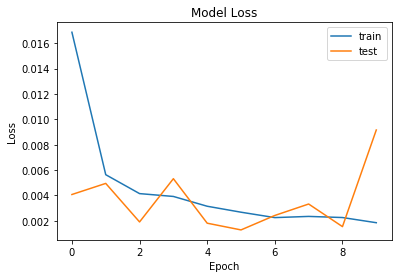

In [45]:
# Plotting...
val_acc = accuracy = history_1.history['val_accuracy']
accuracy = history_1.history['accuracy']

val_loss = accuracy = history_1.history['val_loss']
loss = history_1.history['loss']

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='best')
plt.show()

<h3> 3.3. Find the best setting of neural network using GridSearch, CV and Random search </h3>

In [46]:
# Sequential Neural network function
def build_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=30, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
model = KerasClassifier(build_fn=build_model, verbose=1, shuffle=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [48]:
learning_rate = [0.01, 0.5, 1]
epochs = [10, 20]
batch_size = [100, 200, 300]

In [49]:
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [50]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

In [51]:
# Fit the gridsearch instance
results_gs = grid_search.fit(X_train, y_train)

Epoch 1/20
1062/1062 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9907
Epoch 2/20
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 3/20
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 4/20
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 5/20
1062/1062 [==============================] - 4s 4ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 6/20
1062/1062 [==============================] - 4s 4ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 7/20
1062/1062 [==============================] - 4s 4ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 8/20
1062/1062 [==============================] - 4s 4ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 9/20
1062/1062 [==============================] - 4s 3ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 10/20
1062/1062 [==============================] - 4s 4ms/step - loss: 0.001

In [52]:
# Get the best parameters of the model
results_gs.best_params_

{'batch_size': 300, 'epochs': 20}

In [53]:
# parameters of the randomized search
#grid_search_rn = RandomizedSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

In [54]:
# Fit the randomized instance
#results_rn = grid_search_rn.fit(X_train, y_train)


<h3> 3.4 Anomaly Detection </h3>

<h2> Anomaly Detection </h2>

We assume that our dataset is gaussian or multivariate gaussian. 
That is a dataset with a mean centered around zero and standard deviation one.

In [55]:
# Fraudulent transactions vs valid one
fraudulent_transactions = transactions[transactions['Class']==1]
valid_transactions = transactions[transactions['Class']==0]
fraud_fraction = len(fraudulent_transactions)/float(len(valid_transactions))

In [56]:
# Let's use again the split datasets
# X_train, X_valid, y_train, y_valid

isolation_forest = IsolationForest(max_samples=len(X_train),contamination=fraud_fraction,random_state=1, n_jobs=4)
isolation_forest.fit(X_train)
score = isolation_forest.decision_function(X_train)
y_pred = isolation_forest.predict(X_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


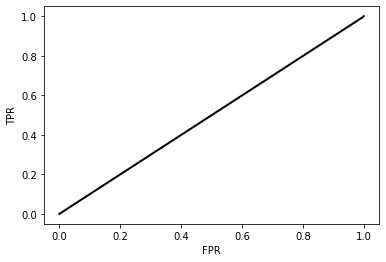

In [57]:
# get the parameters of the threshold using the roc_curve class
fpr, tpr, thresholds = roc_curve(y_valid,y_pred)

# plot FPR against TPR...
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [58]:
# isolation_forest method
isolation_forest.score_samples(X_train)

array([-0.36582589, -0.34422631, -0.39984419, ..., -0.3536188 ,
       -0.40041809, -0.39519391])

In [59]:
# decision_function method
isolation_forest.decision_function(X_train)

array([0.19686618, 0.21846576, 0.16284788, ..., 0.20907327, 0.16227398,
       0.16749815])

In [60]:
y_score = -isolation_forest.decision_function(X_train)

In [61]:
roc_auc_score(y_train, y_score)

0.9072299978811857

<b>Our threshold for anomaly detection is 90.72%</b>

<hr>
<h2> 4. Inference and Observations </h2>

<h3> 4.1. Visualize the scores </h3>

In [62]:
fraudulent_transactions = transactions[transactions['Class']==1]
valid_transactions = transactions[transactions['Class']==0]

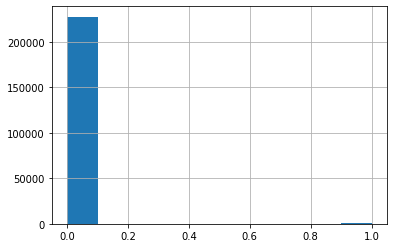

In [63]:
# orginal dataset
transactions['Class'].hist()

In [64]:
X_test_data_hidden = test_data_hidden.drop(columns=['Class', 'Time', 'Amount'])

In [65]:
y_pred_hidden = isolation_forest.predict(X_test_data_hidden)

In [66]:
y_pred_hidden = pd.Series(y_pred_hidden)

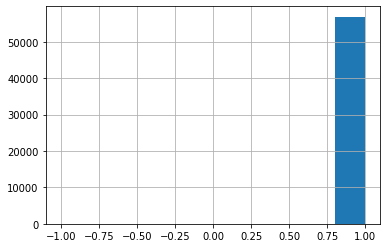

In [67]:
y_pred_hidden.hist()

In [68]:
y_pred_hidden.value_counts()

 1    56915
-1       47
dtype: int64

<h3> 4.2. Find out the threshold value </h3>

According to the algorithm above, the threshold for anomaly detection is 90.72%

This is a highly umbalanded dataset. Oversampling or undersampling techniques help in dealing with such datasets. 